# <font color="maganta"><h3 align="center">Linear Regression (Single Feature)</h3></font> 

<h3 style = "color:brown" >Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from termcolor import colored

from matplotlib import pyplot as plt
#import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

<h3 style = "color:brown" >Data Reading</h3>

In [2]:
df = pd.read_csv('Dhaka Rent.csv')
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [4]:
df.shape

(60, 2)

In [5]:
df.isnull().sum()

area    0
rent    0
dtype: int64

In [6]:
df.describe()

,area,rent
count,60.000000,60.000000
mean,2289.000000,37269.166667
std,538.880509,11770.736234
min,1200.000000,20000.000000
25%,1900.000000,31000.000000
50%,2130.000000,34450.000000
75%,2700.000000,47625.000000
max,3500.000000,70500.000000


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,60.0,2289.000000,538.880509,1200.0,1900.0,2130.0,2700.0,3500.0
rent,60.0,37269.166667,11770.736234,20000.0,31000.0,34450.0,47625.0,70500.0


In [8]:
df['rent'].head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [9]:
df['area'].head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

Text(0.5, 1.0, 'Dhaka Rent Analysis')

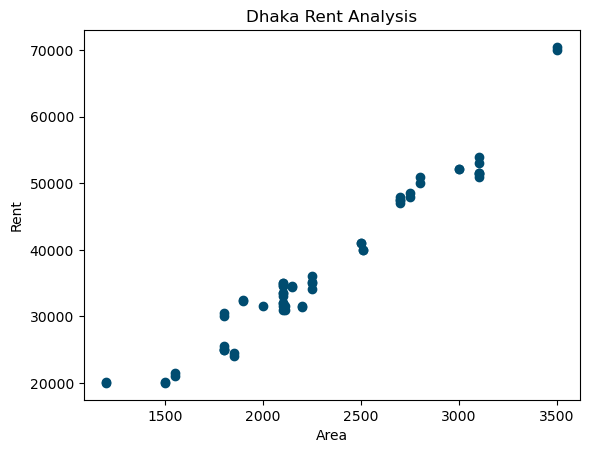

In [10]:
#import matplotlib.pyplot as plt
plt.scatter(df['area'],df['rent'],color='#004c70')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')


In [11]:
X = df[['area']]  #2D
x = df['area']   #1D
y = df['rent']   #1D

<h2 style="color:green">Implementing Regression Regression Model</h2>

In [12]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [13]:
reg.fit(df[['area']],df[['rent']])

#Note: For fit the regression(X,Y), X must be 2D but Y can be 1D or 2D,
#Here df[['area']] is 2D (Dataframe with single column) but df['area'] is 1D (Pandas series).

LinearRegression()

In [14]:
M = reg.coef_
M

array([[21.29266147]])

In [15]:
C = reg.intercept_
C

array([-11469.73544643])

In [16]:
#prediction rent for area 2000
reg.predict([[2000]])

array([[31115.58750079]])

In [17]:
#Predicted rent(Y)
Predicted_Y = reg.predict(df[['area']]) #the output is a array not dataframe

#### Input a column of predicted Y into the DataFrame

In [18]:
df['predicted_rent'] = reg.predict(df[['area']])
df.head()

,area,rent,predicted_rent
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


<h2 style="color:green">Evaluation of model</h2>

#### Measure Mean Absolute Error (MAE)

In [19]:
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(df['rent'], df['predicted_rent'])
print(colored(f'Mean Absolute Error(MAE): {np.round(MAE,2)}',color = 'blue',attrs = ['bold']))

Mean Absolute Error(MAE): 2009.87


#### Measure Mean Squared Error (MSE)

In [20]:
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(df['rent'], df['predicted_rent'])
print(colored(f'Mean Squared Error(MSE): {np.round(MSE,2)}',color = 'blue',attrs = ['bold']))

Mean Squared Error(MSE): 6778077.2


#### Measure  Root Mean Squared Error (RMSE)

In [21]:
#import math
RMSE = math.sqrt(MSE)
print(colored(f'Root Mean Squared Error(RMSE): {np.round(RMSE,2)}',color = 'blue',attrs = ['bold']))

Root Mean Squared Error(RMSE): 2603.47


<h2 style="color:green">Visualization of Model</h2>

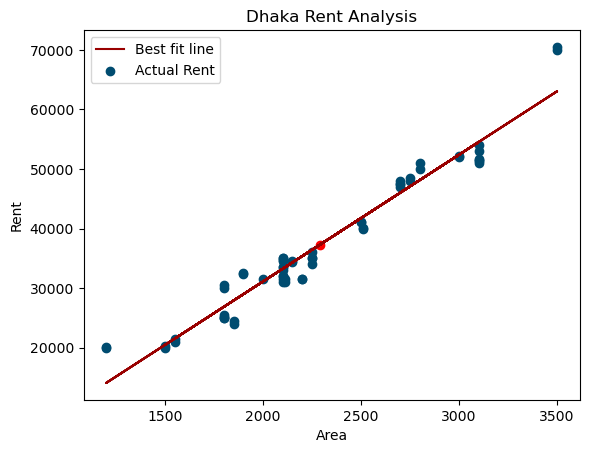

In [22]:
plt.plot(df['area'], df['predicted_rent'],color='#990000', label = 'Best fit line')
plt.scatter(df['area'], df['rent'], color = '#004c70', label = 'Actual Rent')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.title('Dhaka Rent Analysis')
#mean plot
plt.scatter(np.mean(x), np.mean(y), color='red', marker='o')
plt.legend()
plt.show()

<h2 style="color:green">Regression Analysis Manually in Python</h2>

In [23]:
df2 = pd.read_csv('Dhaka Rent.csv')
df2.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [24]:
x = df2['area']
y = df2['rent']

In [25]:
import numpy as np
mean_x = np.mean(x)
mean_y = np.mean(y)

In [26]:
mean_x

2289.0

In [27]:
mean_y

37269.166666666664

1. Slope, m = Σ((x - x̄) * (y - ȳ)) / Σ((x - x̄)^2)
2. Intercept, c = ȳ - m * x̄

In [28]:
coefficient_m = np.sum((x-mean_x)*(y-mean_y))/np.sum((x-mean_x)**2)
coefficient_m

21.292661473611954

In [29]:
intercept_c = mean_y - coefficient_m*mean_x
intercept_c

-11469.7354464311

In [30]:
pred_y = (coefficient_m * x) + intercept_c
pred_y.head()

0    31115.587501
1    33244.853648
2    41761.918238
3    36438.752869
4    52408.248974
Name: area, dtype: float64

In [31]:
df2['predicted_y'] = pred_y
df2.head()

,area,rent,predicted_y
0,2000,31500,31115.587501
1,2100,35000,33244.853648
2,2500,41050,41761.918238
3,2250,36100,36438.752869
4,3000,52100,52408.248974


In [32]:
residuals = y - pred_y
residuals.head()

0     384.412499
1    1755.146352
2    -711.918238
3    -338.752869
4    -308.248974
dtype: float64

In [33]:
df2['residuals'] = y - pred_y

df2.head()

,area,rent,predicted_y,residuals
0,2000,31500,31115.587501,384.412499
1,2100,35000,33244.853648,1755.146352
2,2500,41050,41761.918238,-711.918238
3,2250,36100,36438.752869,-338.752869
4,3000,52100,52408.248974,-308.248974


In [34]:
df2['abs_residual'] = abs(y - pred_y)

df2.head()

,area,rent,predicted_y,residuals,abs_residual
0,2000,31500,31115.587501,384.412499,384.412499
1,2100,35000,33244.853648,1755.146352,1755.146352
2,2500,41050,41761.918238,-711.918238,711.918238
3,2250,36100,36438.752869,-338.752869,338.752869
4,3000,52100,52408.248974,-308.248974,308.248974


<h3 style="color:brown">Measure MAE, MSE & RMSE</h3>

In [38]:
mae = np.mean(abs(y-pred_y)) #MAE = np.mean(df2['abs_residual'])
mse = np.mean((y-pred_y)**2)
rmse = math.sqrt(MSE)

print(colored(f'\nMAE: {np.round(mae,4)}',color = 'blue',attrs = ['bold']))
print(colored(f'\nMSE: {np.round(mse,4)}',color = 'magenta',attrs = ['bold']))
print(colored(f'\nRMSE: {np.round(rmse,4)}',color = 'red',attrs = ['bold']))


MAE: 2009.8695

MSE: 6778077.2041

RMSE: 2603.4741
